In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u # I use astropy units in everything, very helpful for bookkeeping/debugging

from lim import lim # The base intensity mapping object

matplotlib.rcParams.update({'font.size': 18,'figure.figsize':[8,7]}) # Make figures better
#matplotlib.rcParams,update({}'figure.figsize'] = [8,7]
from scipy.ndimage import gaussian_filter
plt.rcParams["mathtext.fontset"] = "dejavuserif"

In [2]:
# Initialize LineModel with default model
m = lim()
m_cii = lim('Lichen_v4', doSim = True)

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


In [ ]:
m_cii.update(model_par = {'zdex': 0.4,
                            'M0': 1900000000.0,
                            'Mmin': 20000000000,
                            'alpha_MH1': 0.74,
                            'alpha_LCII': 0.024,
                            'BehrooziFile': 'sfr_reinterp.dat'},
               tobs = 40000*u.GHz,
               nuObs = 270*u.GHz,
               Delta_nu = 40*u.GHz,
               Omega_field = 4*(u.deg**2),
               dnu = 2.8*u.GHz,
               catalogue_file = '/home/dongwooc/scratchspace/pprun_hiz_npz/COMAP_z5.8-7.9_960Mpc_seed_13819.npz'
            )

270GHz/226GHz Power Spectra Comparison:

In [6]:
pk_nuObs270_zdex04 = [0 for i in range(270)]
for i in range(270):
    pk_nuObs270_zdex04[i] = np.load('/mnt/scratch-lustre/horlaville/cii_pspec_nuObs270/cii_pspec'+str(i)+'.npy')

In [12]:
pk_nuObs226_zdex04 = [0 for i in range(270)]
for i in range(270):
    pk_nuObs226_zdex04[i] = np.load('/mnt/scratch-lustre/horlaville/cii_pspec_nuObs226/cii_pspec'+str(i)+'.npy')

In [7]:
k = np.load('/mnt/scratch-lustre/horlaville/cii_pspec_nuObs270/cii_pspec_ksim.npy')

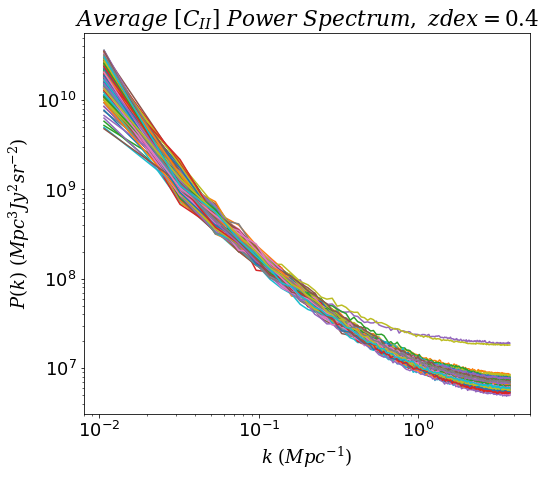

In [10]:
for i in range(270):
    
    plt.plot(k, pk_nuObs270_zdex04[i])
    plt.xscale('log')
    plt.yscale('log')
    plt.grid()
    plt.xlabel(r'$k\ (Mpc^{-1})$')
    plt.ylabel(r'$P(k)\ (Mpc^3 Jy^2 sr^{-2})$')
    plt.title(r'$Average\ [C_{II}]\ Power\ Spectrum,\ zdex=0.4$')

In [9]:
pk_nuObs270_zdex04_avg = np.nanmean(pk_nuObs270_zdex04, axis = 0)
perc68up_nuObs270_zdex04 = np.percentile(pk_nuObs270_zdex04, 84, axis = 0)
perc68down_nuObs270_zdex04 = np.percentile(pk_nuObs270_zdex04, 16, axis = 0)

In [13]:
pk_nuObs226_zdex04_avg = np.nanmean(pk_nuObs226_zdex04, axis = 0)
perc68up_nuObs226_zdex04 = np.percentile(pk_nuObs226_zdex04, 84, axis = 0)
perc68down_nuObs226_zdex04 = np.percentile(pk_nuObs226_zdex04, 16, axis = 0)

In [45]:
plt.rcParams['text.usetex'] = False

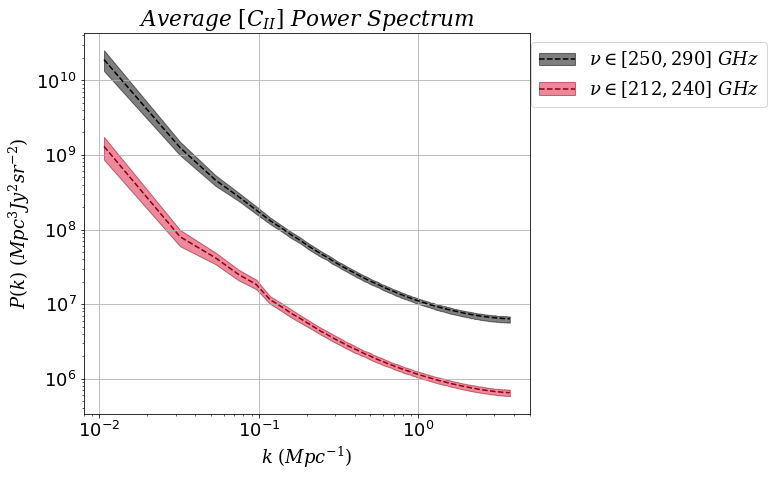

In [47]:
f, a = plt.subplots()

a.fill_between(k, perc68down_nuObs270_zdex04, perc68up_nuObs270_zdex04, edgecolor='#000000', facecolor='#010101', alpha = 0.5)
p01 = a.plot(k, pk_nuObs270_zdex04_avg, color = '#000000', linestyle = '--')
p02 = a.fill(np.nan, np.nan, alpha=0.5, edgecolor='#000000', facecolor='#010101')

a.fill_between(k, perc68down_nuObs226_zdex04, perc68up_nuObs226_zdex04, alpha=0.5, edgecolor='#8C000F', facecolor='#DC143C')
p11 = a.plot(k, pk_nuObs226_zdex04_avg, color = '#8C000F', linestyle = '--')
p12 = a.fill(np.nan, np.nan, alpha=0.5, edgecolor='#8C000F', facecolor='#DC143C')

a.legend([(p02[0], p01[0]), (p12[0], p11[0])], [(r'$\nu \in [250,290]\ GHz$'), (r'$\nu \in [212,240]\ GHz$')], bbox_to_anchor = (1.55,1))



plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.xlabel(r'$k\ (Mpc^{-1})$')
plt.ylabel(r'$P(k)\ (Mpc^3 Jy^2 sr^{-2})$')
plt.title('$Average\ [C_{II}]\ Power\ Spectrum$')

plt.savefig('paper_figs/fig2_many_pspecs/pspecs_nuObs270-226GHz.png', bbox_inches = 'tight')

In [18]:
np.save('paper_figs/fig2_many_pspecs/pk_nuObs270GHz_zdex04_avg.npy', pk_nuObs270_zdex04_avg)
np.save('paper_figs/fig2_many_pspecs/pk_nuObs226GHz_zdex04_avg.npy', pk_nuObs226_zdex04_avg)